In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv('D:/UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
category = df['Category'].value_counts().reset_index()
print(category)

                        index  Category
0              Java Developer        84
1                     Testing        70
2             DevOps Engineer        55
3            Python Developer        48
4               Web Designing        45
5                          HR        44
6                      Hadoop        42
7                  Blockchain        40
8               ETL Developer        40
9          Operations Manager        40
10               Data Science        40
11                      Sales        40
12        Mechanical Engineer        40
13                       Arts        36
14                   Database        33
15     Electrical Engineering        30
16         Health and fitness        30
17                        PMO        30
18           Business Analyst        28
19           DotNet Developer        28
20         Automation Testing        26
21  Network Security Engineer        25
22              SAP Developer        24
23             Civil Engineer        24


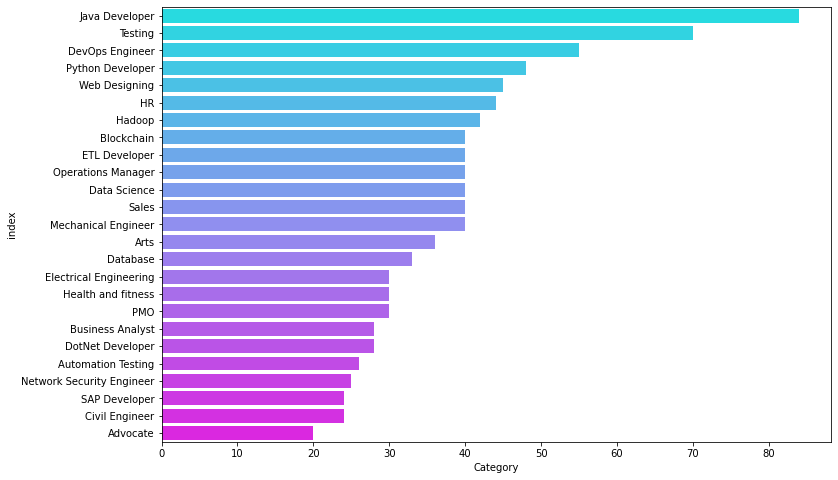

In [4]:
plt.figure(figsize=(12,8))
sns.barplot(x=category['Category'], y=category['index'], palette='cool')
plt.show()

In [10]:
def NewResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText) 
    resumeText = re.sub('RT|cc', ' ', resumeText) 
    resumeText = re.sub('#\S+', '', resumeText)  
    resumeText = re.sub('@\S+', '  ', resumeText)  
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  
    return resumeText

In [11]:
df['cleaned'] = df['Resume'].apply(lambda x:NewResume(x))
df.head()

,Category,Resume,cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [17]:
label = LabelEncoder()
df['Category'] = label.fit_transform(df['Category'])
df.head()

,Category,Resume,cleaned
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [21]:
text = df['cleaned'].values
target = df['Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(text)
WordFeatures = word_vectorizer.transform(text)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, target, random_state=24, test_size=0.3)

In [23]:
model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [24]:
y_pred = model.predict(X_test)

In [26]:
print(f'Training Accuracy   :- {(model.score(X_train, y_train)*100).round(2)}%')
print(f'Validation Accuracy :- {(model.score(X_test, y_test)*100).round(2)}%')

Training Accuracy   :- 98.96%
Validation Accuracy :- 97.58%


In [29]:
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))
print("\n Classification report for classifier %s\n%sn" % (model, metrics.classification_report(y_test, y_pred)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.98

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier())
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       1.00      1.00      1.00        16
           2       1.00      0.80      0.89        10
           3       1.00      1.00      1.00        11
           4       0.75      1.00      0.86         6
           5       1.00      1.00      1.00         6
           6       1.00      0.79      0.88        14
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00        10
          11       0.83      1.00      0.91        10
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.0